In [7]:
!pip install pandas matplotlib seaborn scikit-learn

  Using cached pandas-2.3.1-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached matplotlib-3.10.3-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.7.1-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached numpy-2.3.1-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.2-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.59.0-cp313-cp313-win_amd64.whl.metadata (110 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached scipy-1.16.0-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')
data_train.head()

FileNotFoundError: [Errno 2] No such file or directory: './train.csv'

In [15]:
missing_per_column = data_train.isnull().sum()
print(missing_per_column)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [16]:
print(data_train.shape)

(1460, 81)


In [17]:
data_train.drop('Id', axis=1, inplace=True)

data_train.shape

(1460, 80)

In [18]:
data_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


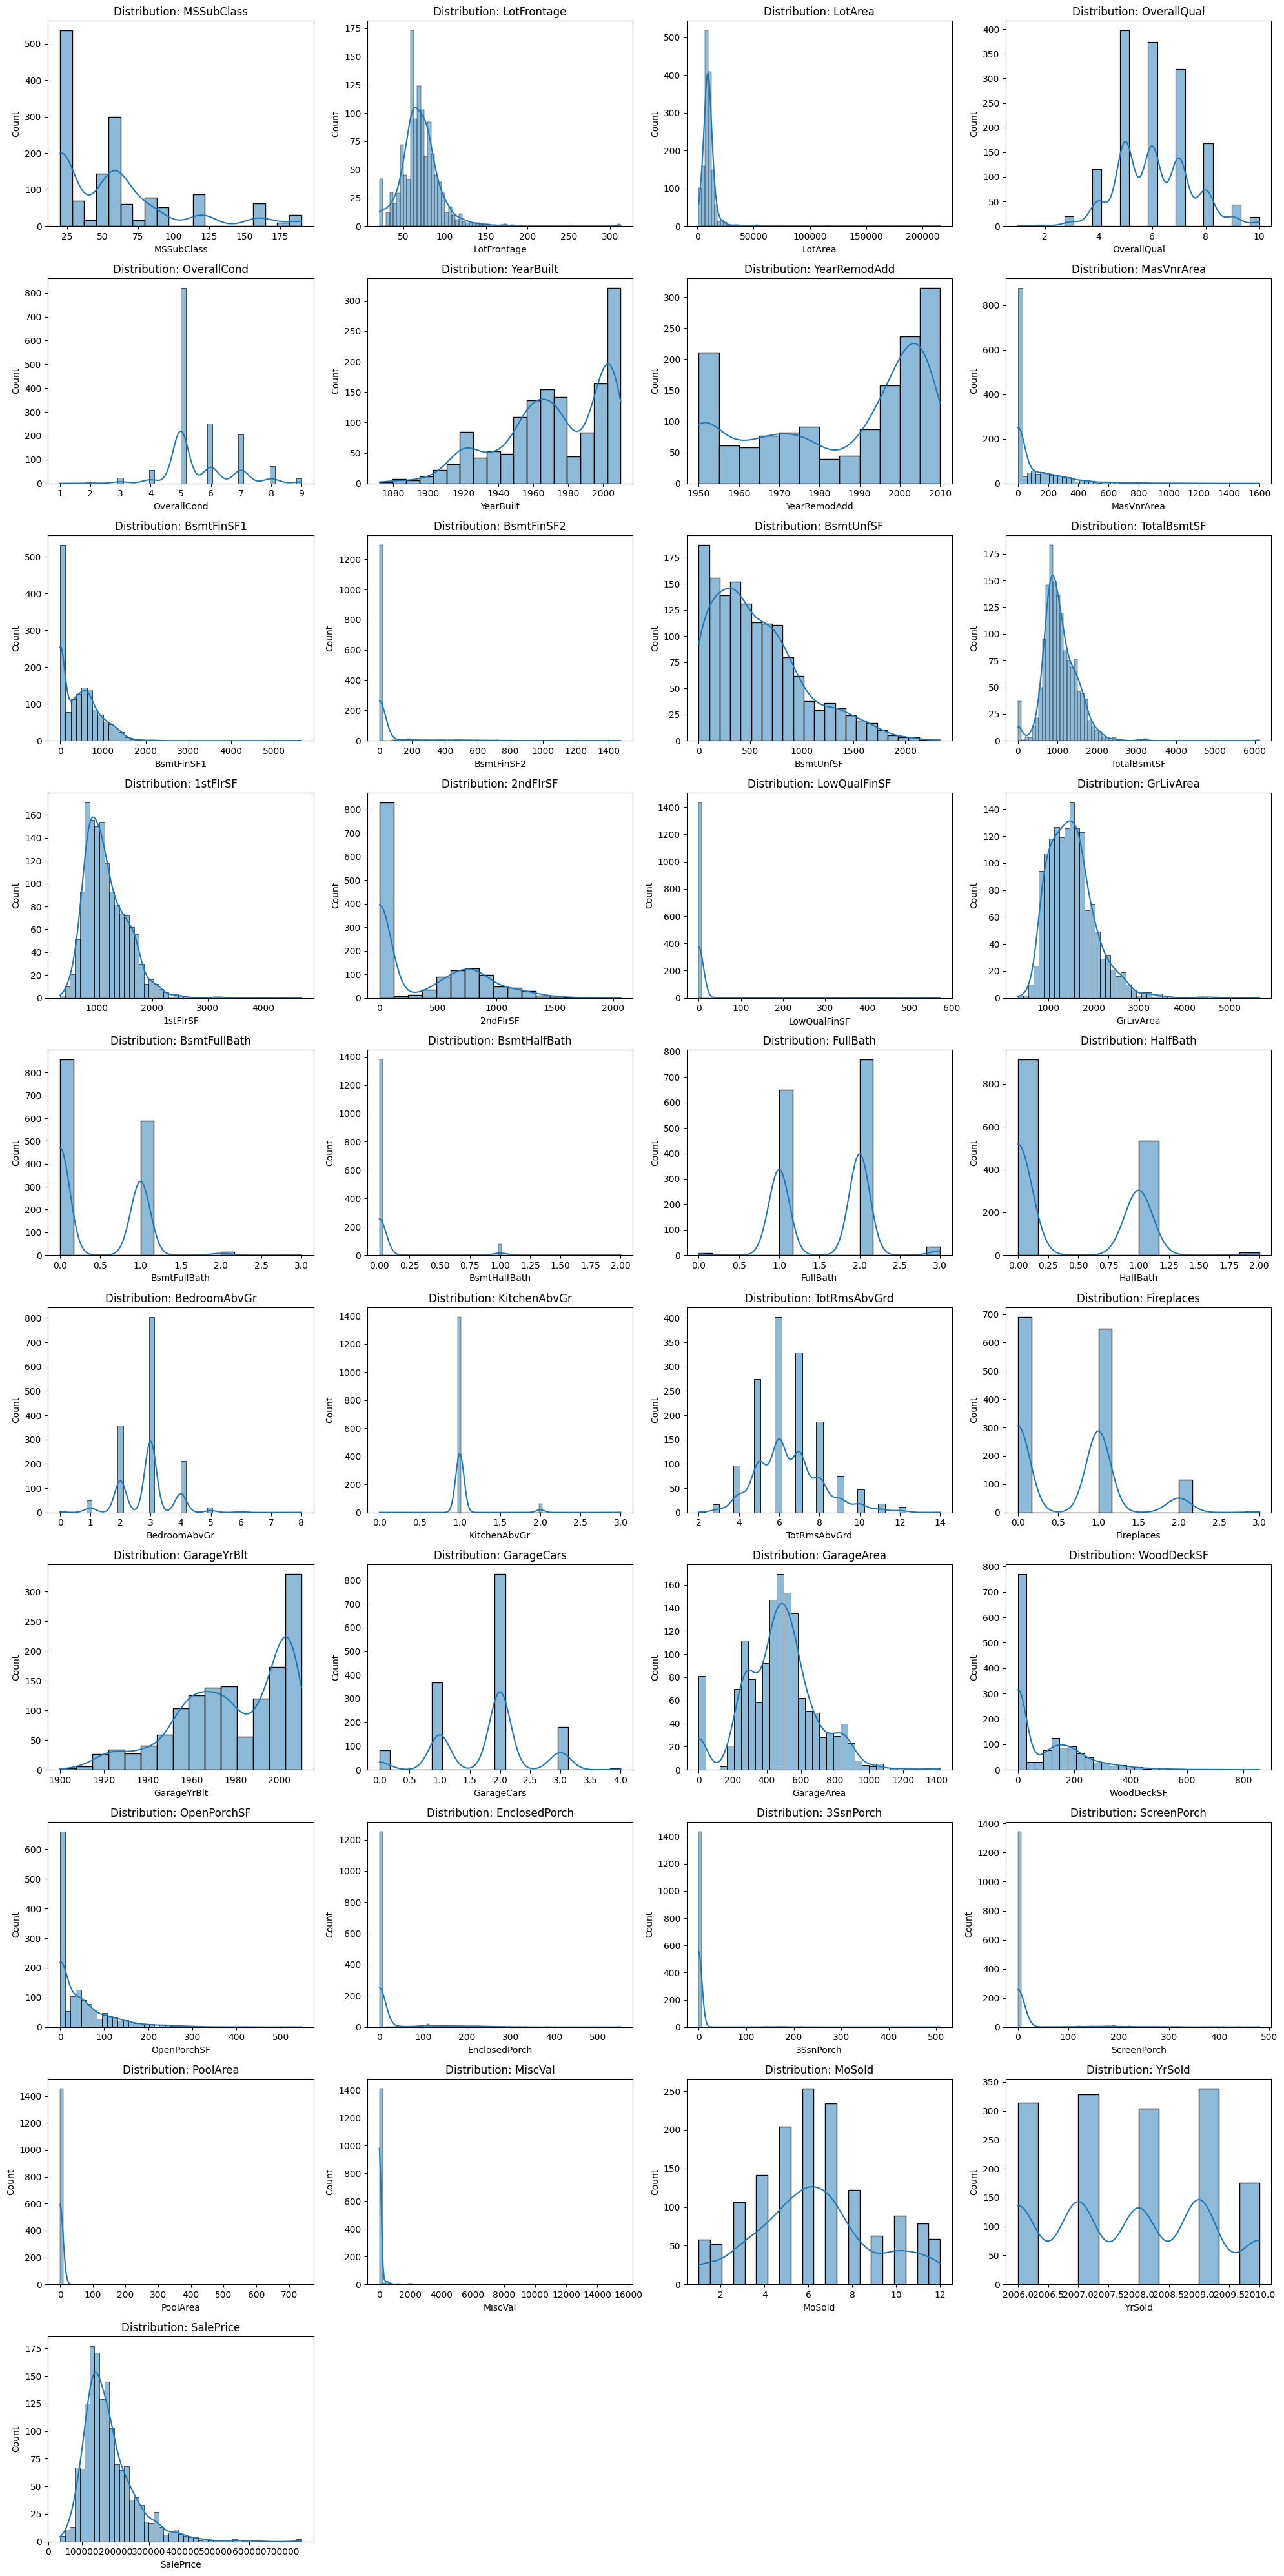

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = data_train.select_dtypes(include=['number']).columns

num_cols = len(numeric_cols)
cols = 4 
rows = (num_cols + cols - 1) // cols

plt.figure(figsize=(5 * cols, 4 * rows))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(data_train[col].dropna(), kde=True)
    plt.title(f'Distribution: {col}')

plt.tight_layout()
plt.show()

In [21]:
print("Skewness: %f" % data_train['SalePrice'].skew())
print("Kurtosis: %f" % data_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


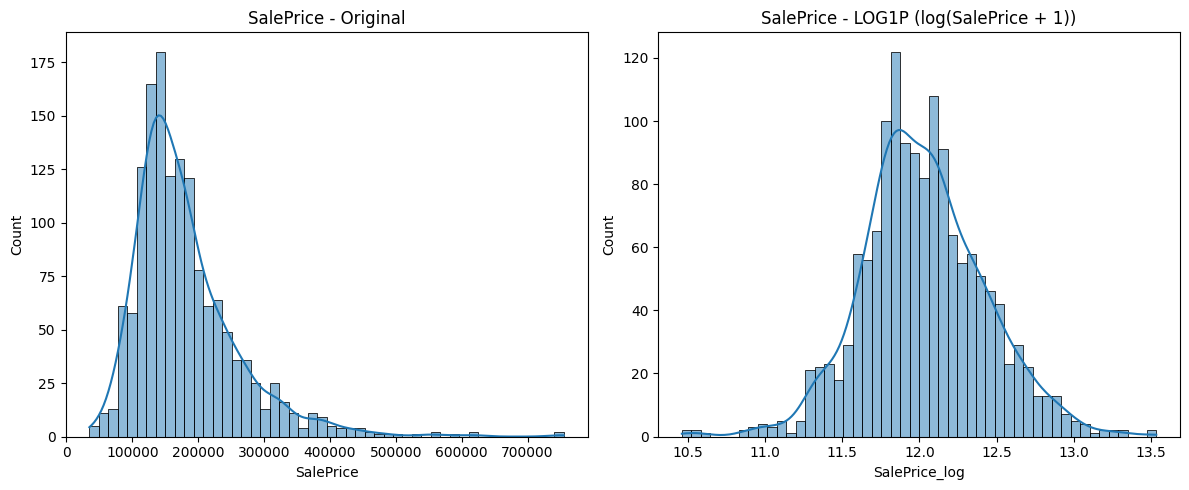

In [22]:
data_train['SalePrice_log'] = np.log1p(data_train['SalePrice'])

# Porównanieprzed i po 
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(data_train['SalePrice'], bins=50, kde=True, ax=axes[0])
axes[0].set_title("SalePrice - Original")

sns.histplot(data_train['SalePrice_log'], bins=50, kde=True, ax=axes[1])
axes[1].set_title("SalePrice - LOG1P (log(SalePrice + 1))")

plt.tight_layout()
plt.show()

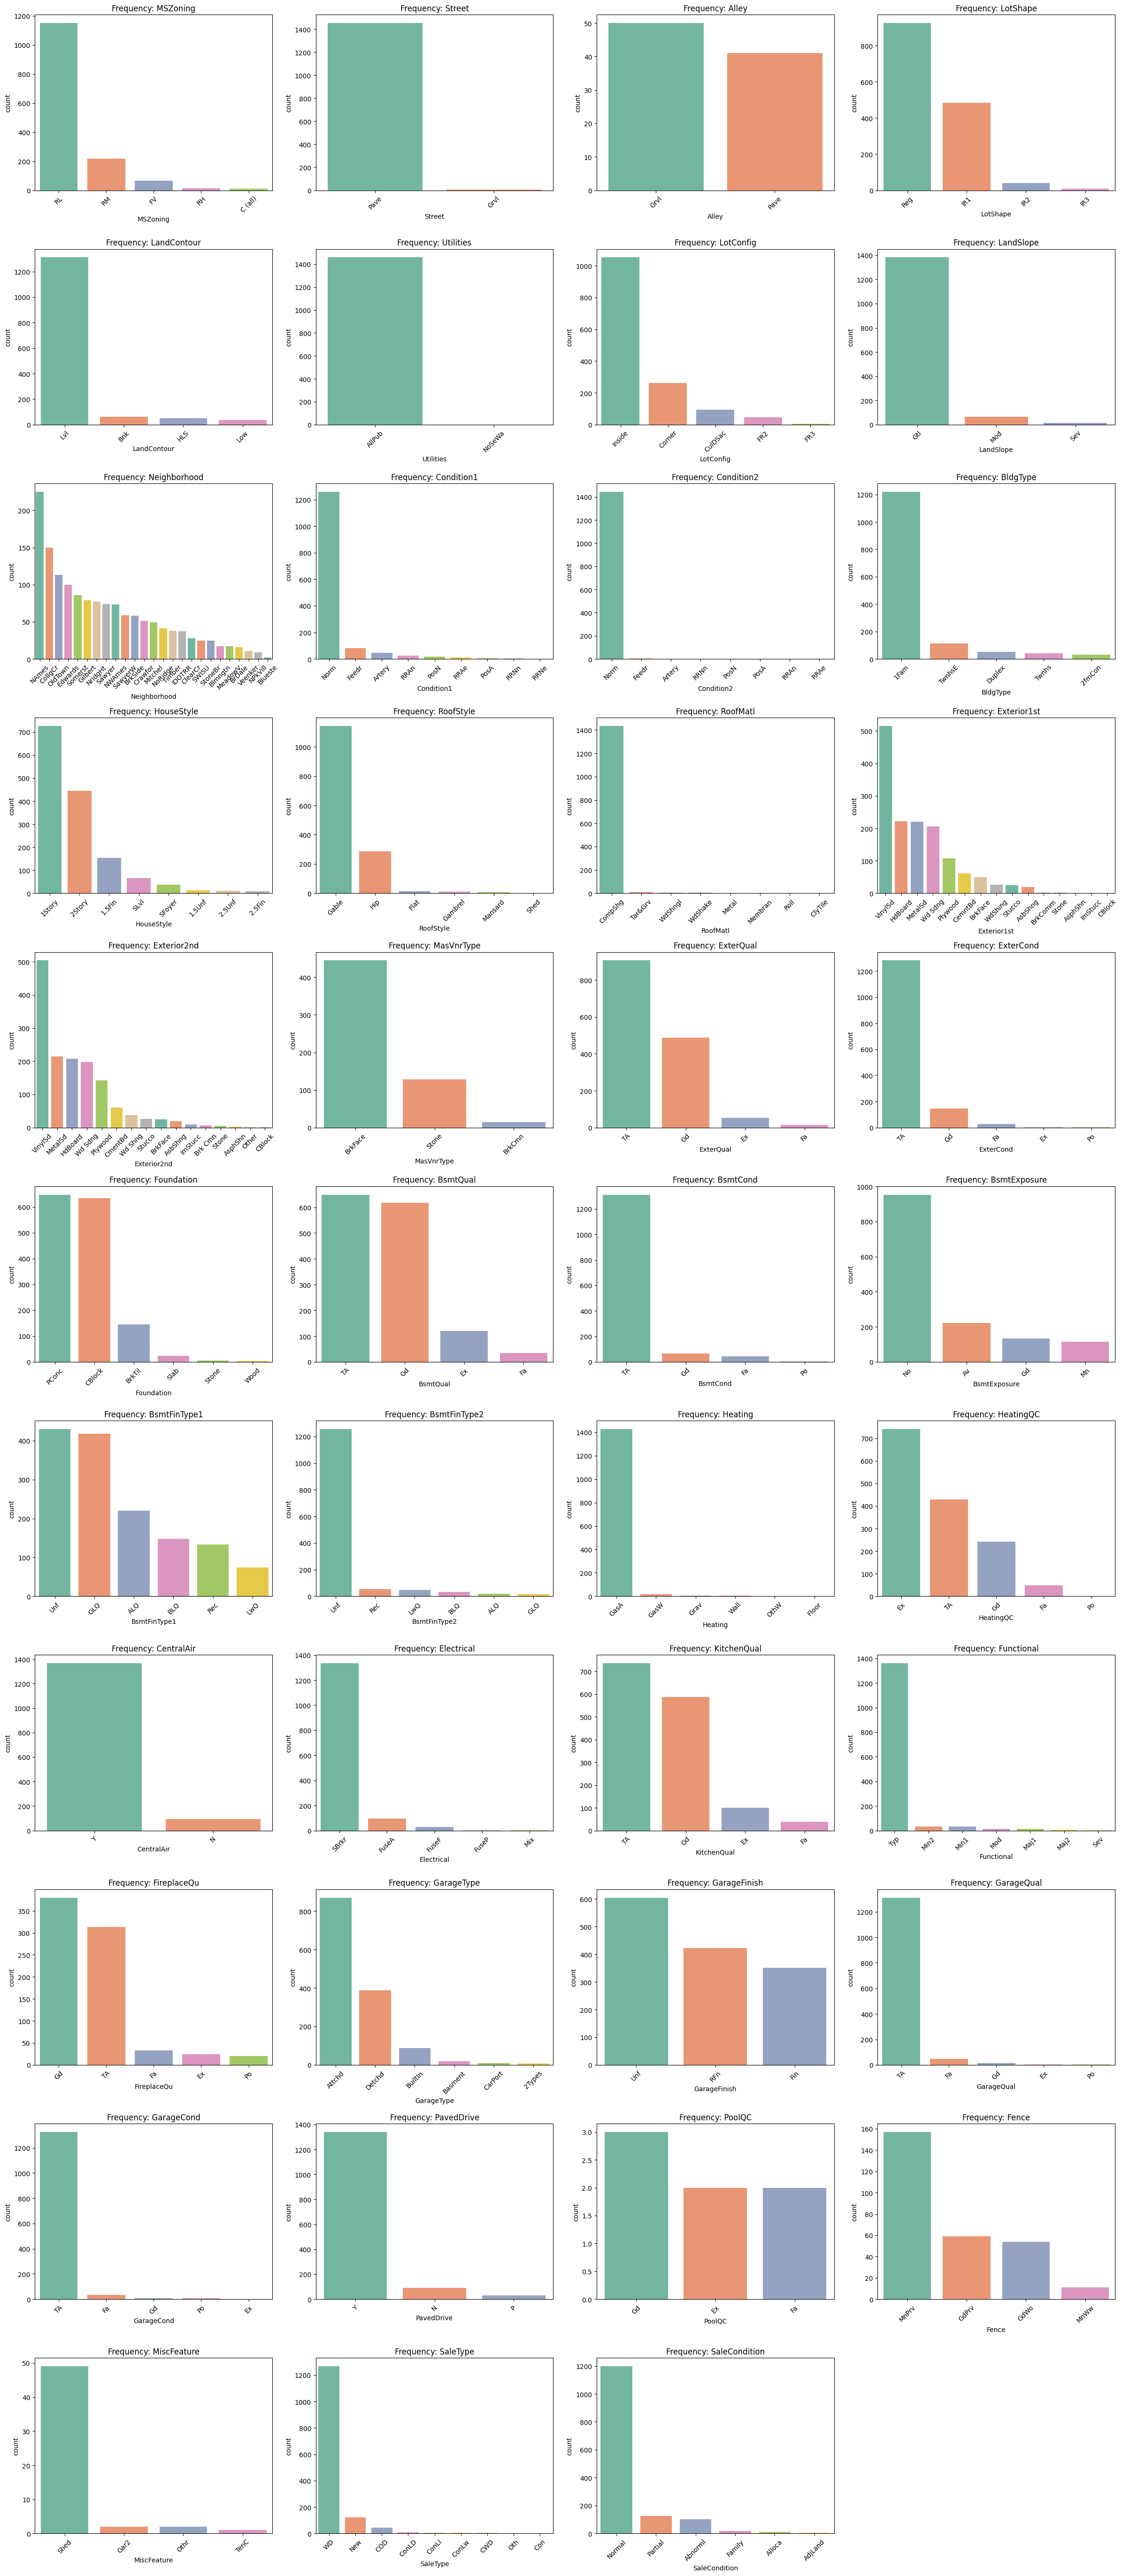

In [24]:
cat_cols = data_train.select_dtypes(include=['object', 'category']).columns

num_cols = len(cat_cols)
cols = 4
rows = (num_cols + cols - 1) // cols

plt.figure(figsize=(6 * cols, 5 * rows))  

for i, col in enumerate(cat_cols, 1):
    plt.subplot(rows, cols, i)
    sns.countplot(data=data_train, x=col, order=data_train[col].value_counts().index, palette='Set2')
    plt.title(f'Frequency: {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

In [25]:
missing_percent = data_train.isnull().mean() * 100

missing_percent = missing_percent.sort_values(ascending=False)

print(missing_percent.head(20))

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
GarageType       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtQual         2.534247
BsmtCond         2.534247
MasVnrArea       0.547945
Electrical       0.068493
BldgType         0.000000
dtype: float64


In [26]:
cols_to_drop = missing_percent[missing_percent > 40].index.tolist()

print(f"Columns to remove : ({len(cols_to_drop)}): {cols_to_drop}")

data_cleaned = data_train.drop(columns=cols_to_drop)

print(f"Dataset shape data_train: {data_train.shape}")
print(f"Dataset with removed columns: {data_cleaned.shape}")

Columns to remove : (6): ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'MasVnrType', 'FireplaceQu']
Dataset shape data_train: (1460, 81)
Dataset with removed columns: (1460, 75)


In [27]:
num_cols = data_cleaned.select_dtypes(include='number')

correlations = num_cols.corr()['SalePrice'].sort_values(key=abs, ascending=False)

print(correlations.head(20))

SalePrice        1.000000
SalePrice_log    0.948374
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
Name: SalePrice, dtype: float64


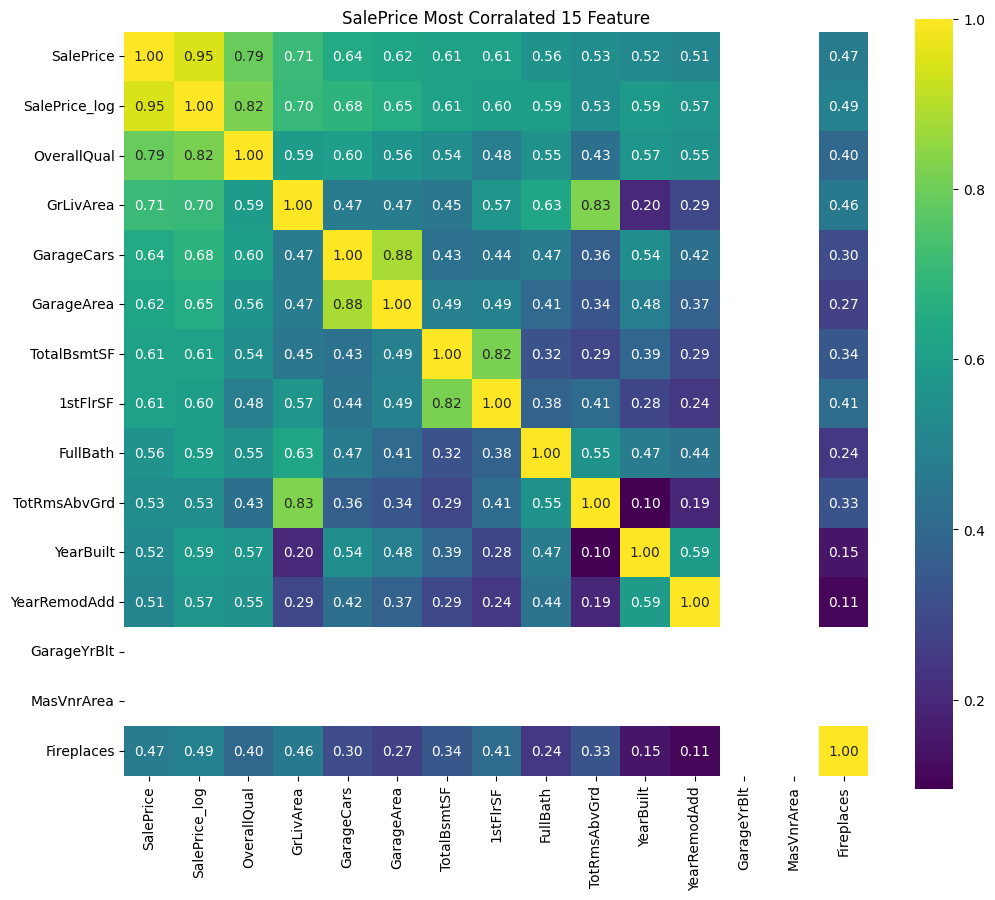

In [28]:
corrmat = data_cleaned.corr(numeric_only=True)

k = 15
top_cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data_cleaned[top_cols].values.T)

plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, square=True, fmt='.2f', 
            annot_kws={'size': 10}, yticklabels=top_cols.values, xticklabels=top_cols.values,
            cmap='viridis')
plt.title(f'SalePrice Most Corralated {k} Feature')
plt.show()

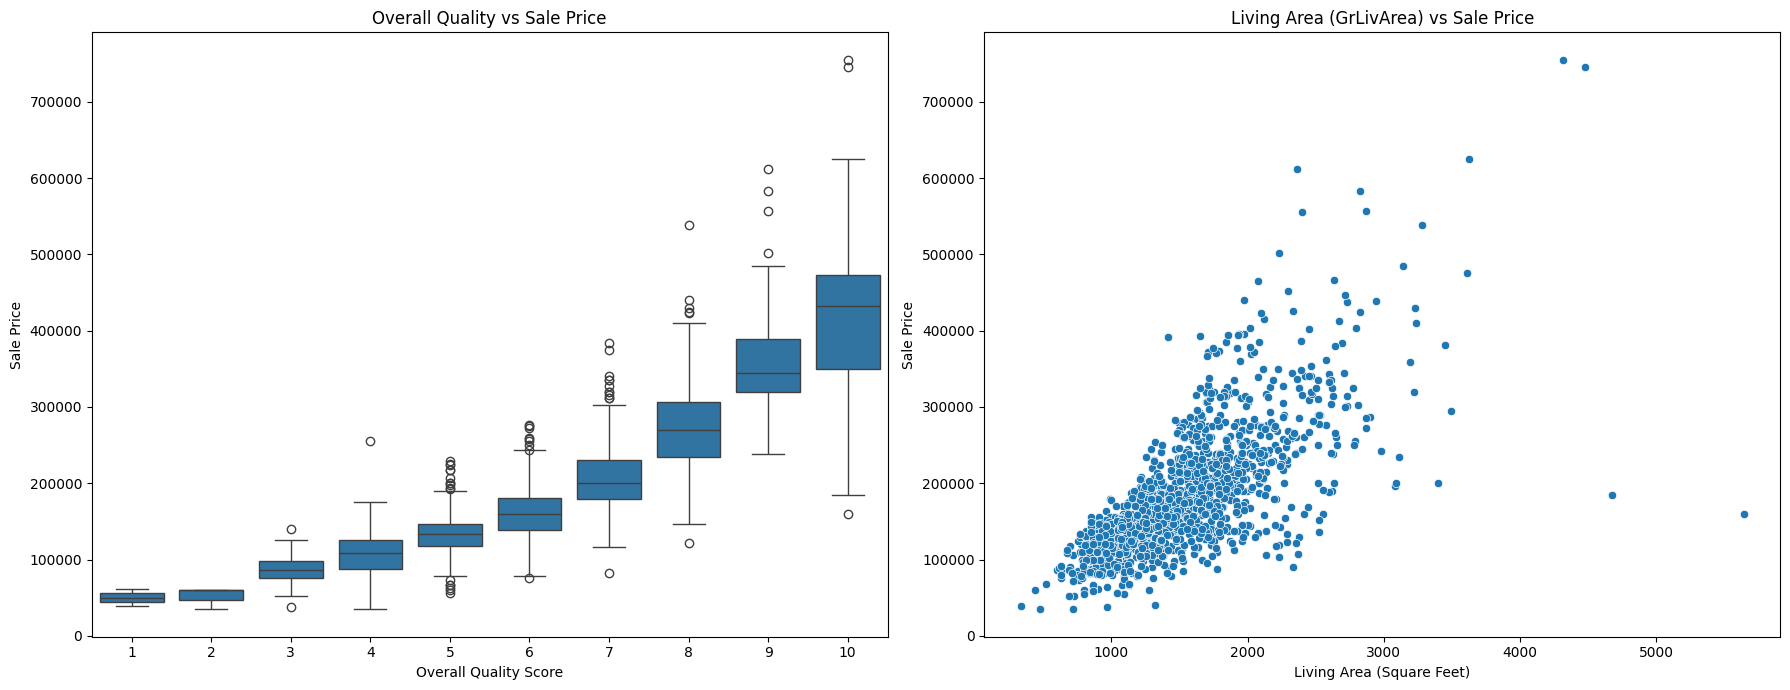

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

sns.boxplot(x='OverallQual', y='SalePrice', data=data_cleaned, ax=axes[0])
axes[0].set_title('Overall Quality vs Sale Price')
axes[0].set_xlabel('Overall Quality Score')
axes[0].set_ylabel('Sale Price')

sns.scatterplot(x='GrLivArea', y='SalePrice', data=data_cleaned, ax=axes[1], palette='Set3' )
axes[1].set_title('Living Area (GrLivArea) vs Sale Price')
axes[1].set_xlabel('Living Area (Square Feet)')
axes[1].set_ylabel('Sale Price')

plt.tight_layout()
plt.show()

